In [15]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.configs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
region = 'CIO'
file = merged_pf_stats_file(region)
df = pd.read_csv(file, index_col=0)
basin_id = (abs(df['mean_latitude'])>=0) & (df['mean_longitude']<np.inf)
df = df.where(basin_id).dropna()

In [14]:
df.mean_longitude.min()

55.0732536315918

# Some basic stats of observations distributions

Text(0.5, 1.0, 'Observation Freq WMP [%]')

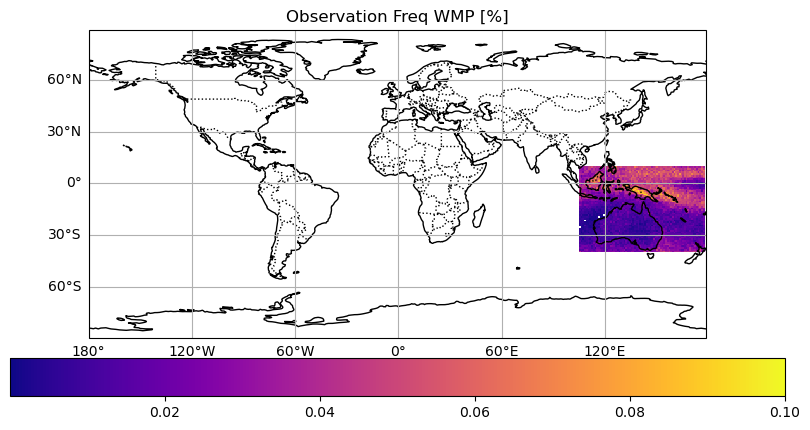

In [101]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

lat_bins = np.arange(-90, 90, 1)  # Create 18 bins (10-degree intervals)
lon_bins = np.arange(-180, 180, 1)  # Create 36 bins (10-degree intervals)

hist, lat_edges, lon_edges = np.histogram2d(df['mean_latitude'], df['mean_longitude'], bins=[lat_bins, lon_bins])
hist = 100*(hist/hist.sum())
# setup map
# ax.set_extent([30, 95, -6, 6], crs=ccrs.PlateCarree())  # Focus on the region of interest
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Define meshgrid for latitude and longitude edges
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2  # Calculate bin centers for longitude
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2  # Calculate bin centers for latitude
lon_grid, lat_grid = np.meshgrid(lon_centers, lat_centers)

# Plot the frequency histogram using pcolormesh
cmap = plt.cm.plasma.copy()
norm = colors.Normalize(vmin=1e-10, vmax=0.1)
cmap.set_under('white')
frequency_plot = ax.pcolormesh(lon_grid, lat_grid, hist, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
# Add a colorbar
cbar = plt.colorbar(frequency_plot, orientation='horizontal', ax=ax, pad=0.05)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

ax.set_title(f'Observation Freq {region} [%]')

In [3]:
df

,pf_filename,observation_time,mean_latitude,mean_longitude,precipitation_centroid_latitude,precipitation_centroid_longitude,num_pixels,num_conv_pixels,num_strat_pixels,num_1mmhr_pixels,...,num_2mmhr_pixels,max_2mmhr_size,num_5mmhr_pixels,max_5mmhr_size,num_10mmhr_pixels,max_10mmhr_size,total_precip,total_conv_precip,total_strat_precip,max_precip
0,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150801_14:22:15,-0.298781,105.206100,-0.306830,105.199658,41,0,37,1,...,0,0,0,0,0,0,13.222820,0.000000,12.479753,1.751050
1,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150802_00:20:55,-10.175630,129.428574,-10.150165,129.375823,119,119,0,63,...,47,11,14,4,5,2,281.419121,281.419121,0.000000,14.713996
2,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150802_20:16:53,-39.345928,169.426300,-39.421037,169.489721,1203,25,1145,552,...,324,107,66,9,6,2,1916.767337,77.019328,1832.968106,18.222609
3,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150803_11:15:35,-35.655945,163.757980,-35.700762,163.950219,2852,614,2088,1912,...,1486,1131,896,321,373,141,12484.380480,5286.434025,7159.491173,102.183739
4,/home/disk/tc/pangulo/gpm_pf/WMP/2015/08/pf_00...,20150804_10:13:35,-39.726315,175.624344,-39.694190,175.609434,76,0,74,19,...,6,2,0,0,0,0,64.420885,0.000000,63.416622,3.646185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_28...,20201222_11:11:47,9.665322,148.021774,9.695586,148.015276,62,44,18,35,...,19,9,8,2,2,1,146.765439,119.591517,27.173922,16.954823
2179,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_28...,20201219_12:13:11,5.910000,148.279999,5.912161,148.252048,45,33,12,30,...,23,16,13,11,4,2,227.012214,203.378261,23.633953,56.905506
2180,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_29...,20201215_14:06:34,8.709523,135.210709,8.724554,135.221889,42,30,12,26,...,13,4,1,1,0,0,69.382962,51.940311,17.442651,6.413221
2181,/home/disk/tc/pangulo/gpm_pf/WMP/2020/12/pf_30...,20201231_19:32:39,7.433914,166.927383,7.361085,166.969989,115,87,28,64,...,40,18,15,3,3,1,301.965344,250.511032,51.454312,33.474358


Text(0.5, 1.0, 'Local GPM PF Observation Times, WMP')

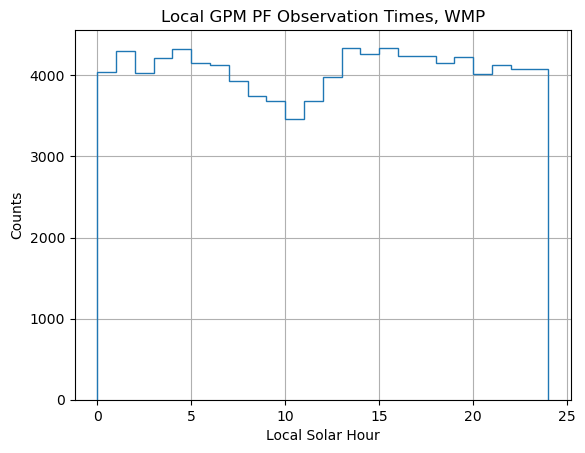

In [102]:
# observation times
fig, ax = plt.subplots()
time_diff = pd.to_timedelta(df['mean_longitude'] / 15, unit='h')
solar_time = pd.to_datetime(df['observation_time'], format='%Y%m%d_%H:%M:%S') + time_diff
solar_time.dt.hour.hist(
    ax=ax,
    bins=np.arange(0, 25, 1),
    histtype='step'
)
ax.set_xlabel('Local Solar Hour')
ax.set_ylabel('Counts');
ax.set_title(f'Local GPM PF Observation Times, {region}')

Text(0.5, 1.0, 'Local GPM PF Observation Times, WMP')

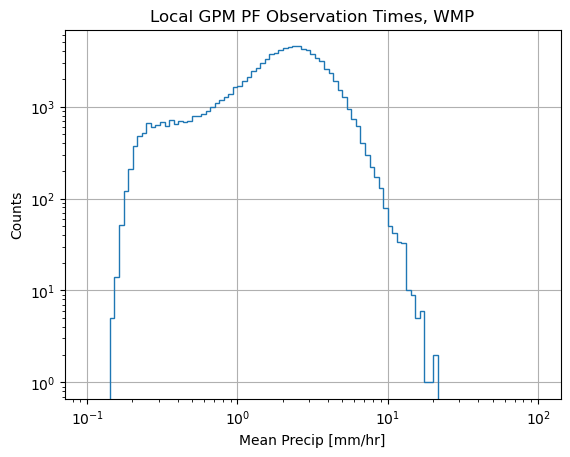

In [103]:
fig, ax = plt.subplots()
mean_pr = df['total_precip']/df['num_pixels']
mean_pr.hist(
    ax=ax, 
    bins=np.logspace(-1, 2, 100),
    histtype='step'
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mean Precip [mm/hr]')
ax.set_ylabel('Counts')
ax.set_title(f'Local GPM PF Observation Times, {region}')